In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv('possum (2).csv')
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
data.shape

(104, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
data.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

In [7]:
## filling the null values 

In [8]:
data.age.fillna(data.age.mean(), inplace=True)
data.footlgth.fillna(data.footlgth.mean(), inplace=True)
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
data.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

In [10]:
### Univariate analysis

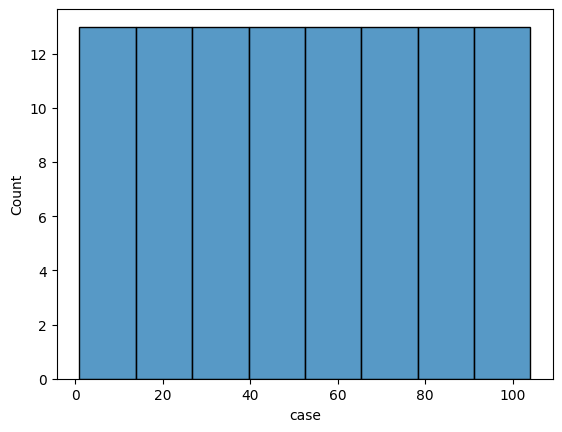

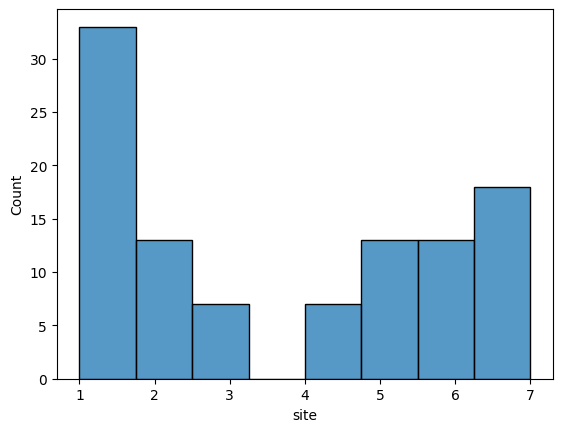

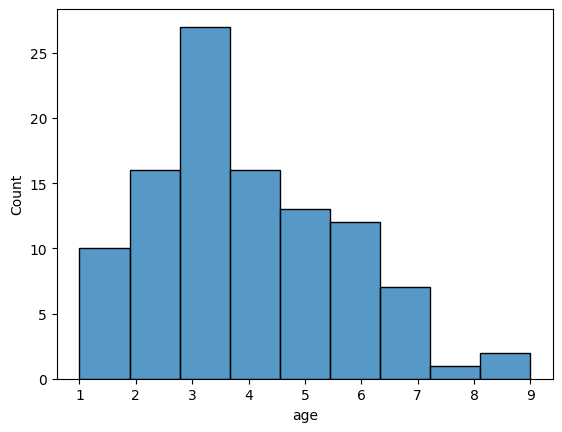

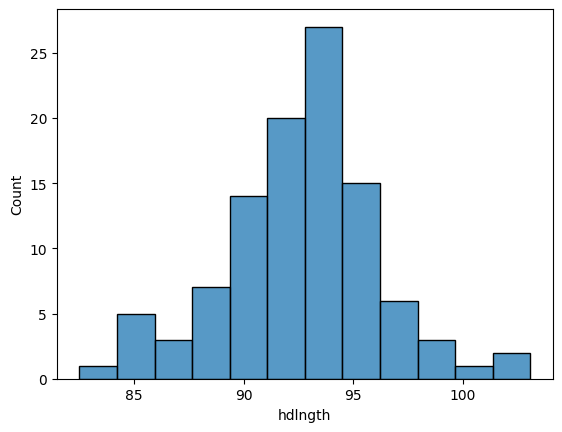

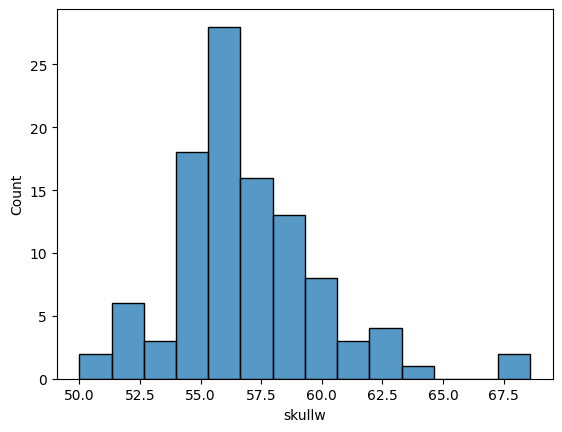

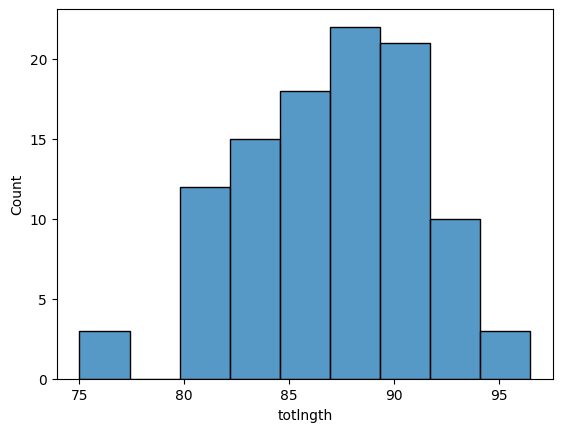

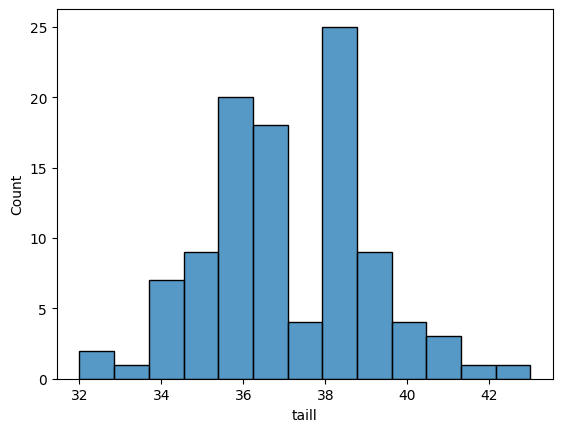

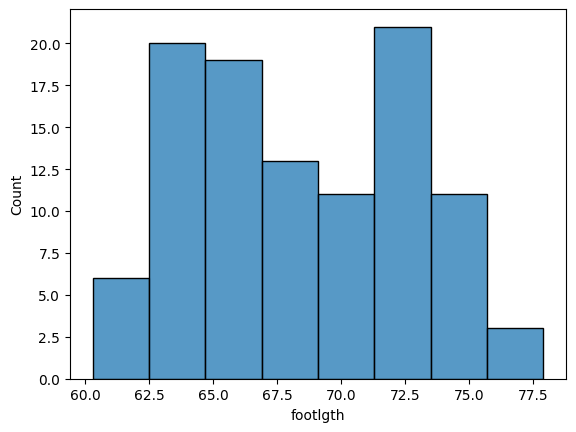

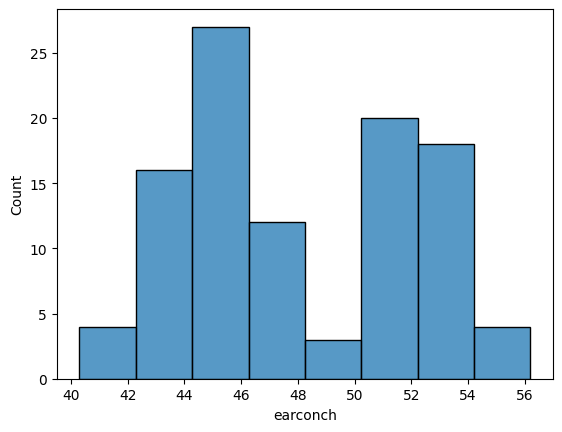

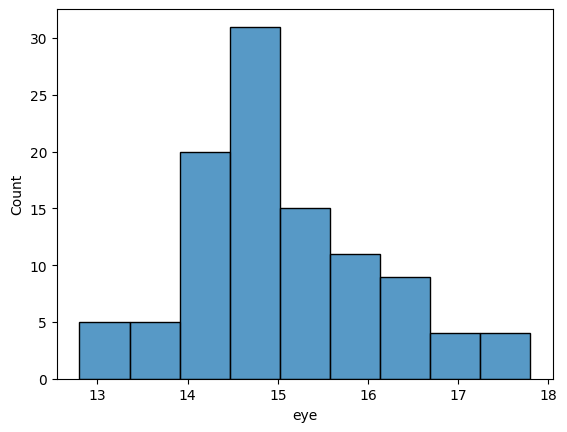

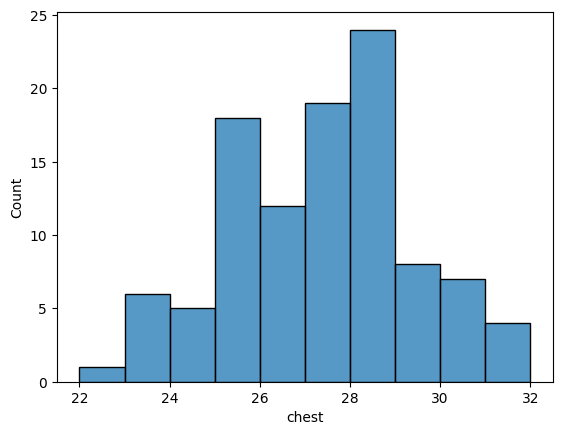

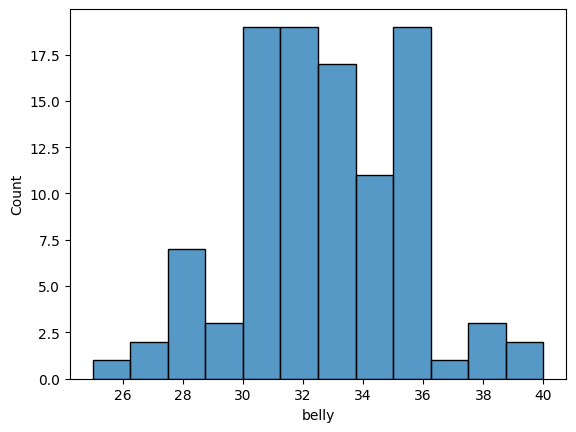

In [11]:
for i in  data.columns:
    if data[i].dtypes !="object":
        sns.histplot(x=data[i])
        plt.show()

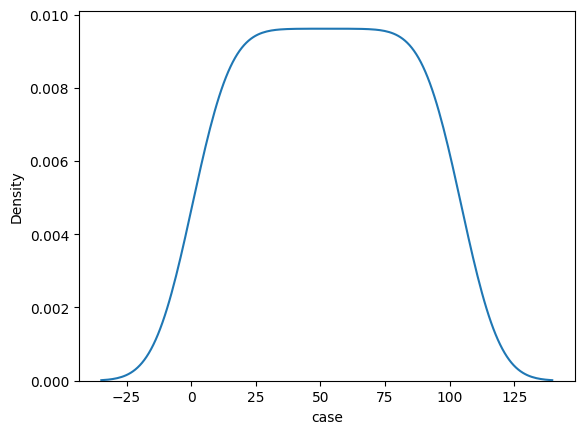

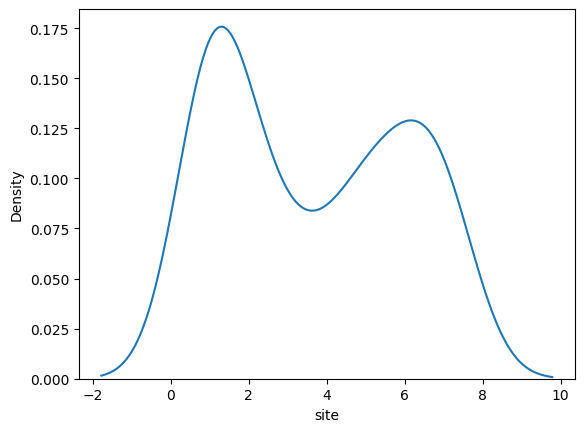

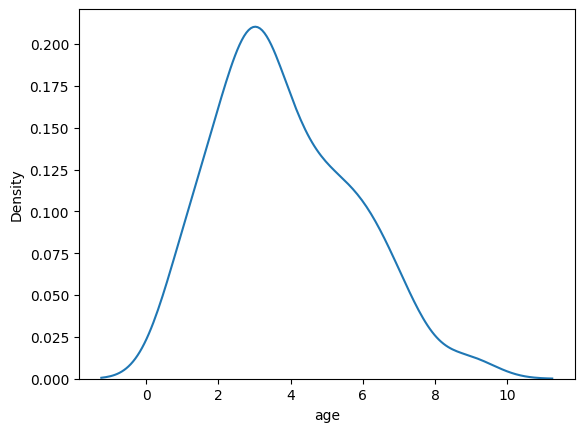

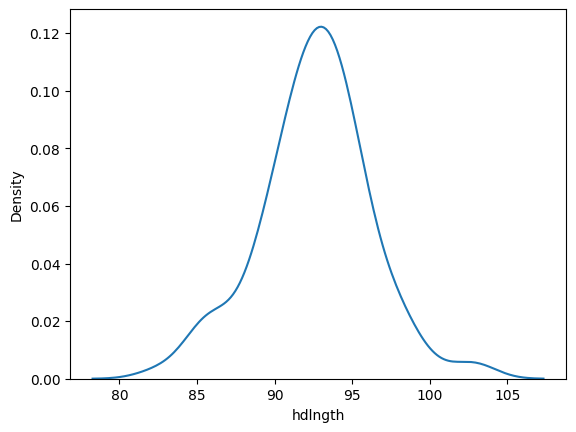

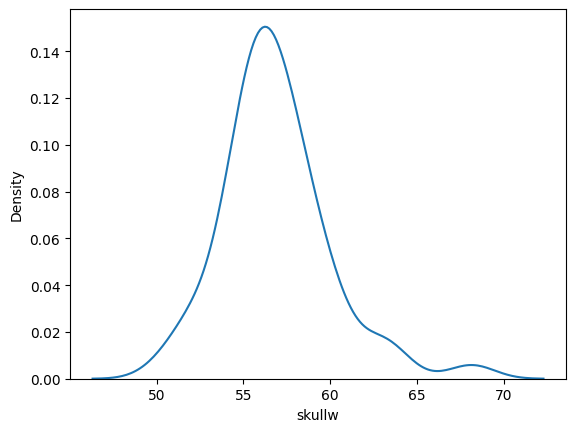

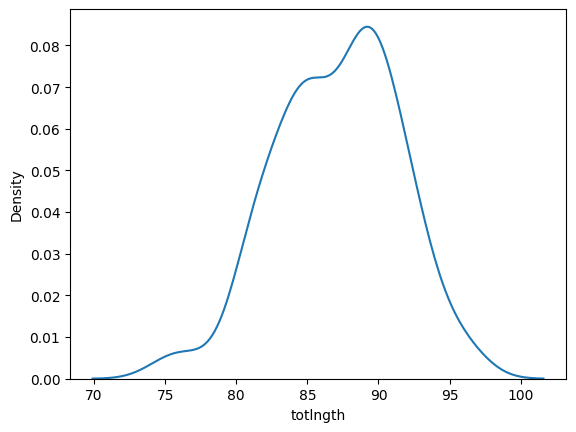

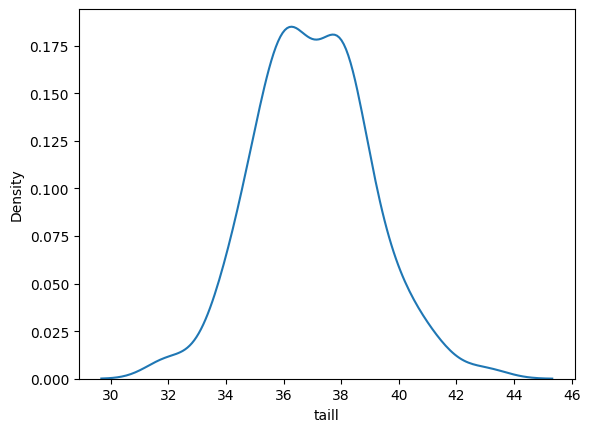

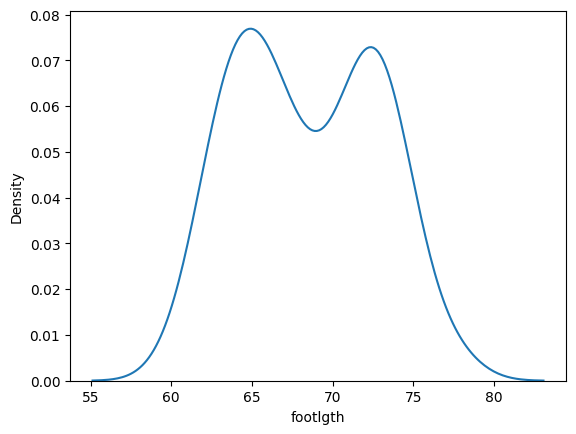

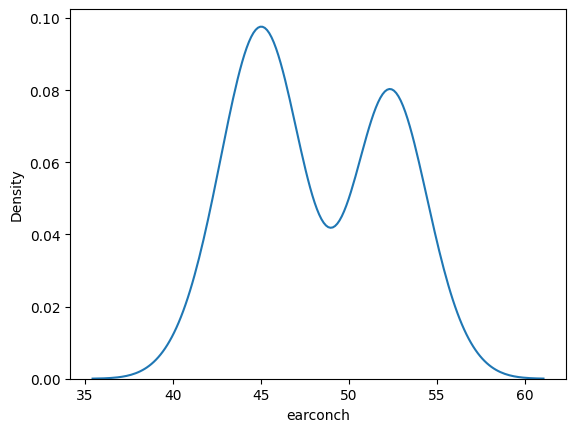

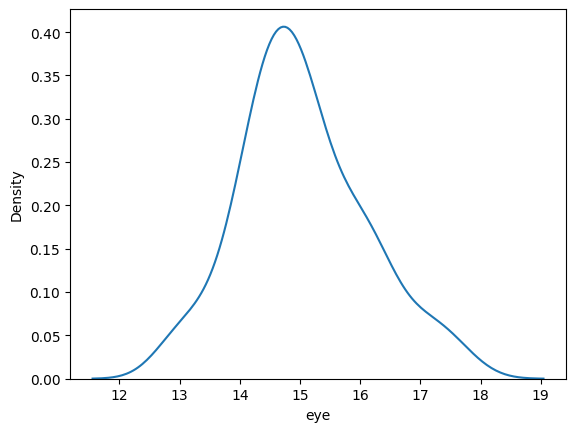

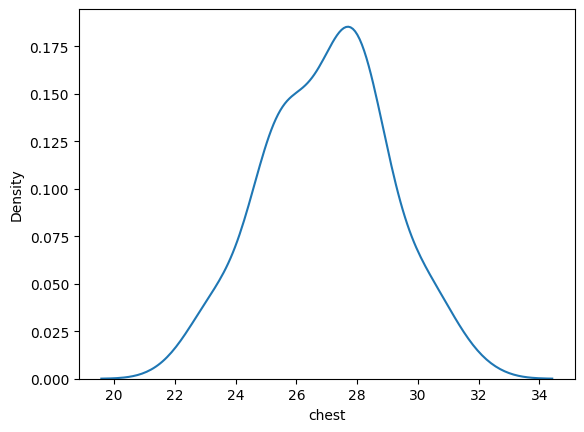

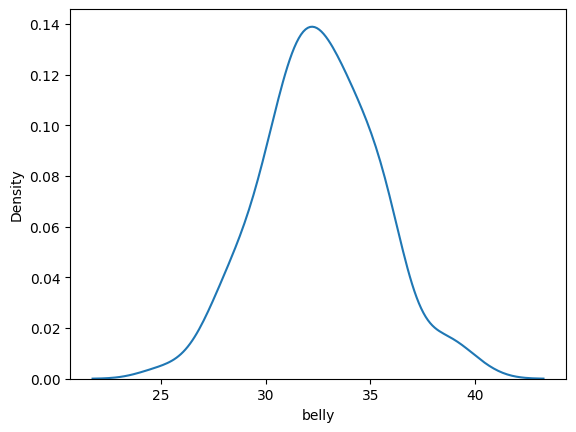

In [12]:
for i in  data.columns:
    if data[i].dtypes !="object":
        sns.kdeplot(x=data[i])
        plt.show()

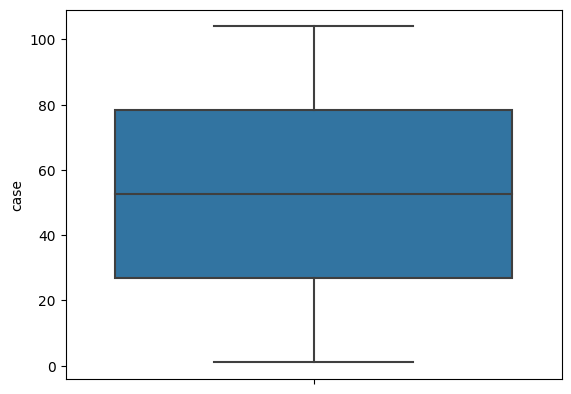

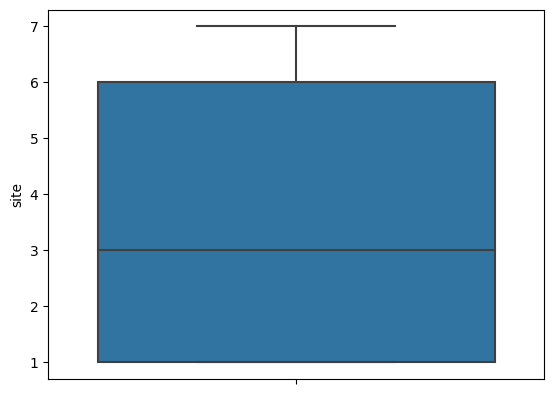

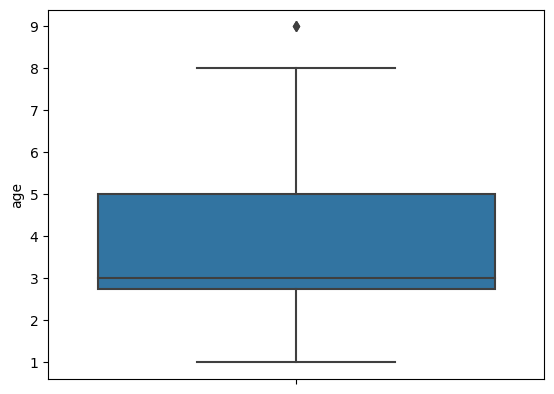

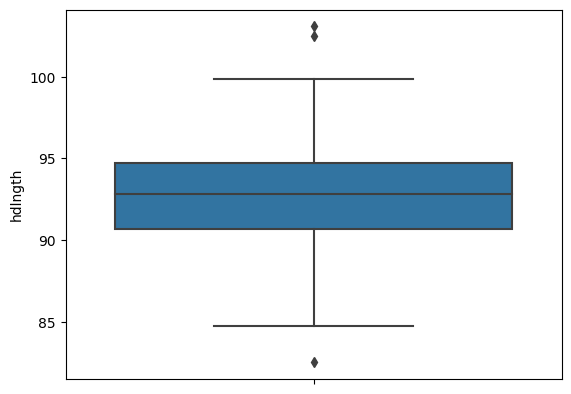

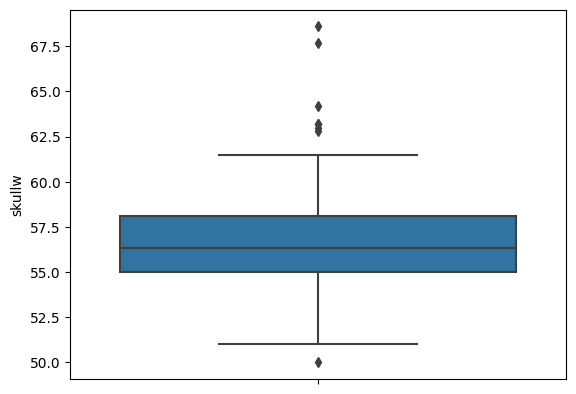

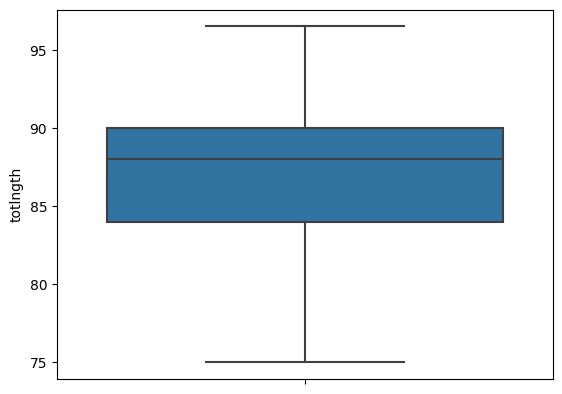

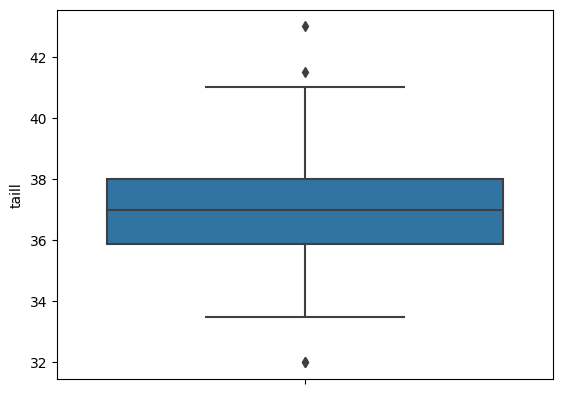

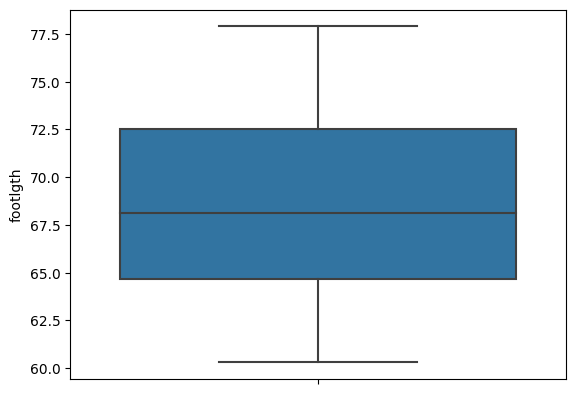

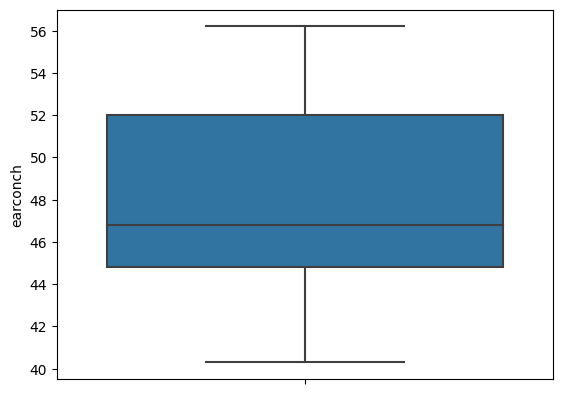

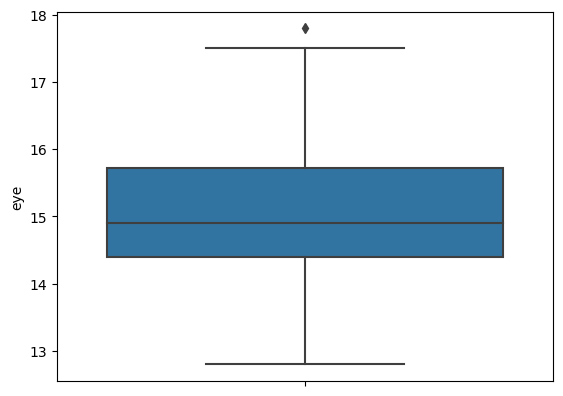

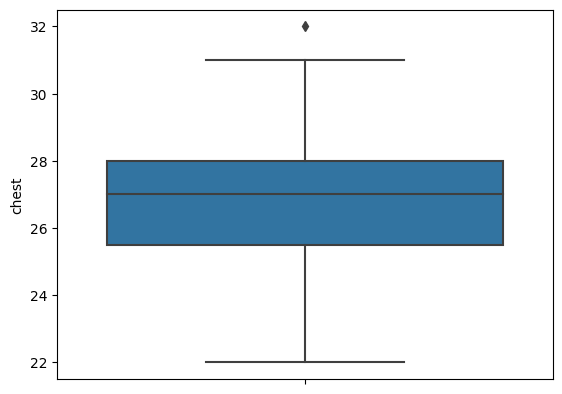

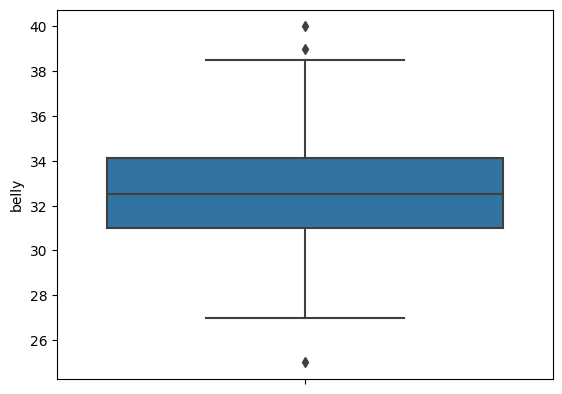

In [13]:
for i in  data.columns:
    if data[i].dtypes !="object":
        sns.boxplot(y=data[i])
        plt.show()

In [14]:
 ###Label encoding the categorical columns

In [15]:
le= LabelEncoder()

In [16]:
data['Pop']=le.fit_transform(data['Pop'])

In [17]:
data['sex']=le.fit_transform(data['sex'])

In [18]:
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [19]:
##checking the correlation of footlgth with others 

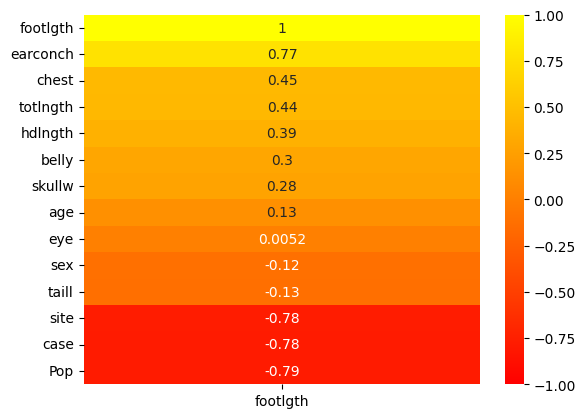

In [20]:
sns.heatmap(data.corr()[["footlgth"]].sort_values(by="footlgth",ascending=False), vmin=-1,vmax=1,annot=True,cmap="autumn");

In [21]:
###Lets take only the columns with good correlation with the target


In [22]:
x=data[['hdlngth','skullw','totlngth','earconch','chest','belly']].values 

In [23]:
y=data[['footlgth']].values

In [24]:
##feature scaling

In [42]:
x=r.fit_transform(x)


NameError: name 'r' is not defined

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [31]:
##model building

In [32]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}


In [33]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with{}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained withLinearRegression
r2score: 63.17052581265098
training_score: 72.7310239195591
testing_score: 63.17052581265098
mae: 1.9791807594209667
mse: 5.987938016162728
rmse_test: 2.4470263619672608
****************************************************************************************************
model trained withRidge
r2score: 63.232937659885735
training_score: 72.73094713396087
testing_score: 63.232937659885735
mae: 1.9775711798688416
mse: 5.977790755552522
rmse_test: 2.444952096780737
****************************************************************************************************
model trained withLinearSVR
r2score: 2.227543273898658
training_score: 34.105846212310276
testing_score: 2.227543273898658
mae: 3.3613109591785566
mse: 15.896382543657174
rmse_test: 3.9870267799021835
****************************************************************************************************
model trained withDecisionTreeRegressor
r2score: 49.68009777594501
training_score: 100.0
testin

In [34]:
###RANDOM FOREST REGRESSION

In [35]:
model=RandomForestRegressor()

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred=model.predict(x)

In [38]:
Output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTION"),dtype=float)

In [39]:
Output.head()

,ACTUAL,PREDICTION
0,74.5,73.818
1,72.5,71.939
2,75.4,74.971
3,76.1,75.224
4,71.0,71.411


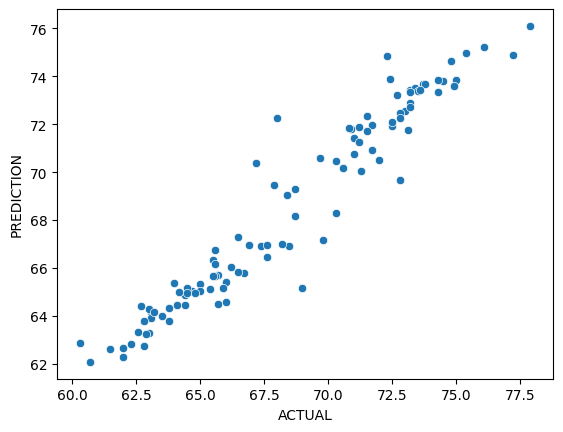

In [40]:
sns.scatterplot(data=Output, x="ACTUAL", y="PREDICTION");